```
uv pip install numpy uproot pandas matplotlib hist scipy ipykernel
```

/tmp/ipykernel_736/3155388571.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 6))


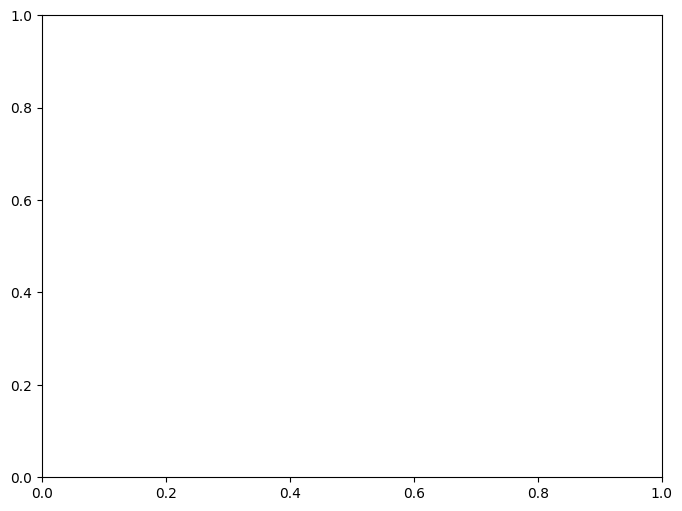

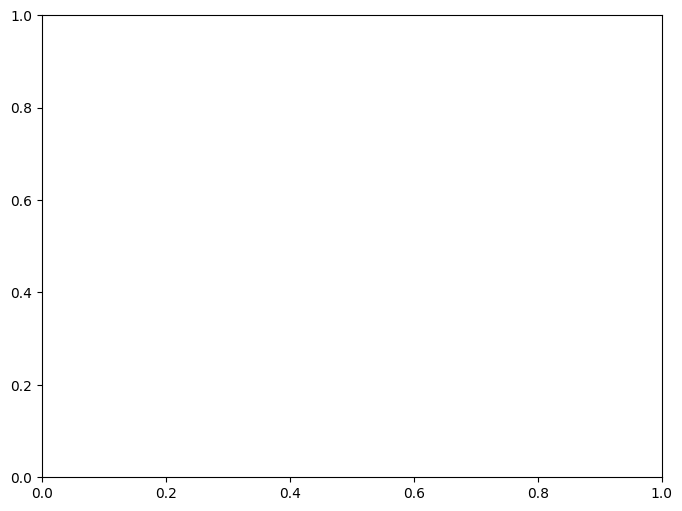

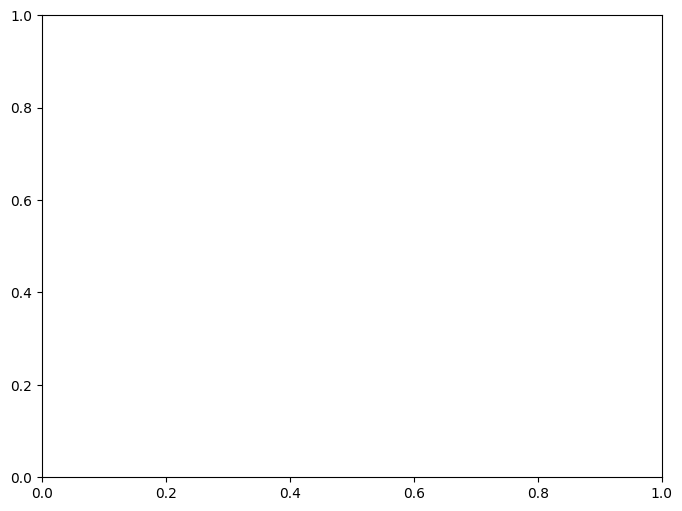

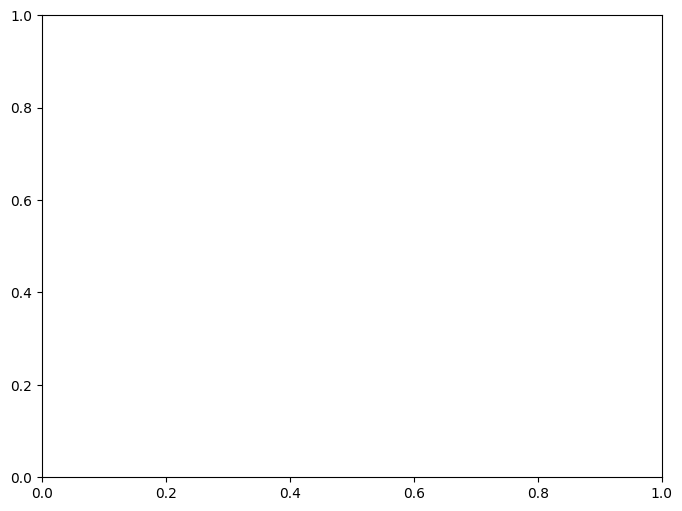

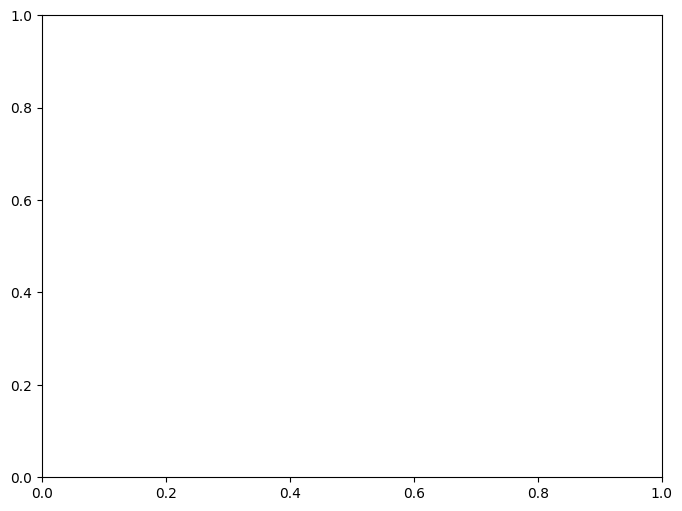

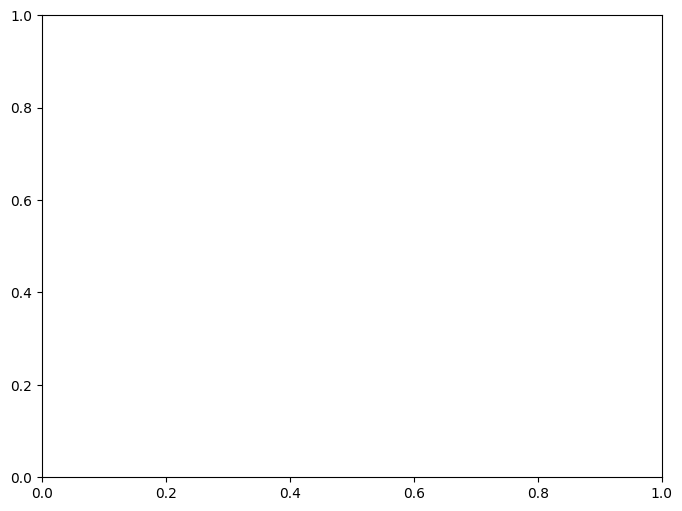

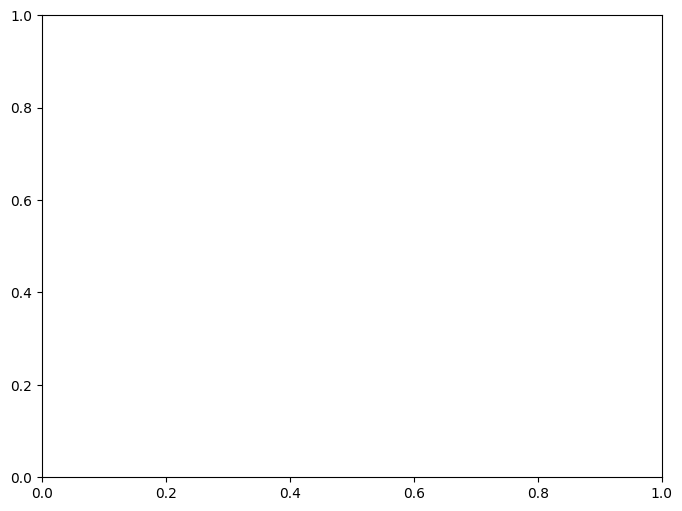

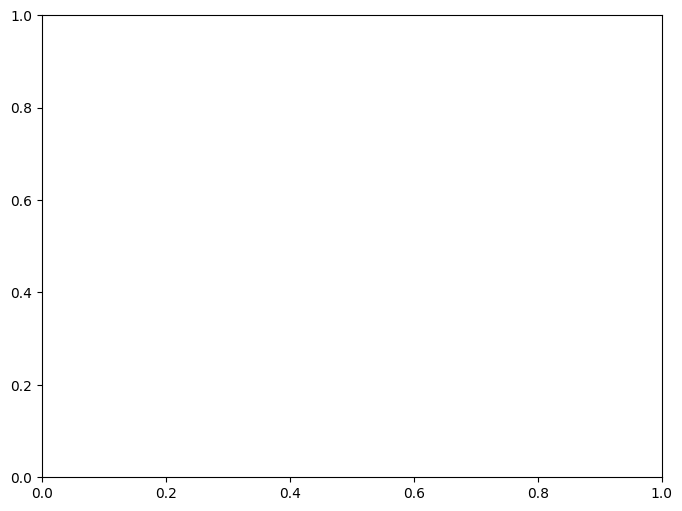

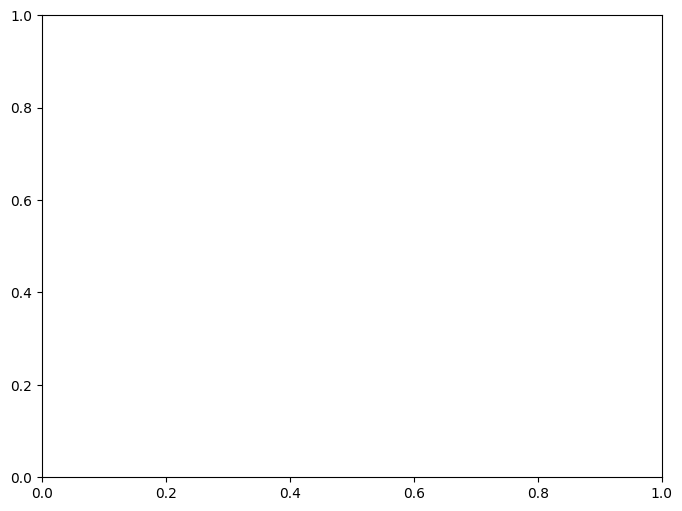

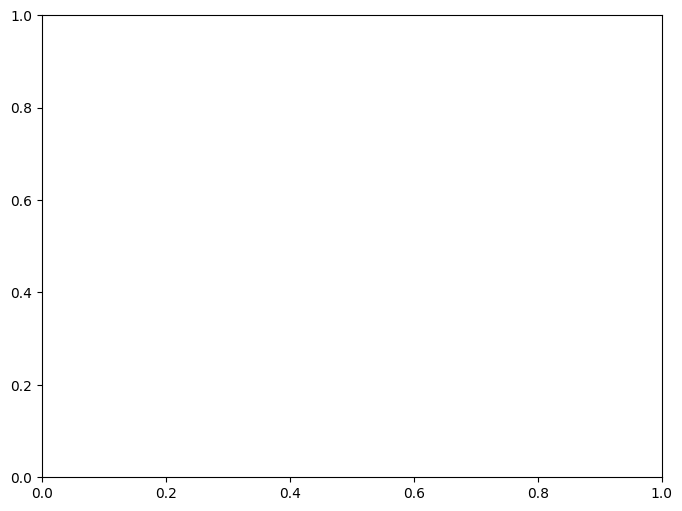

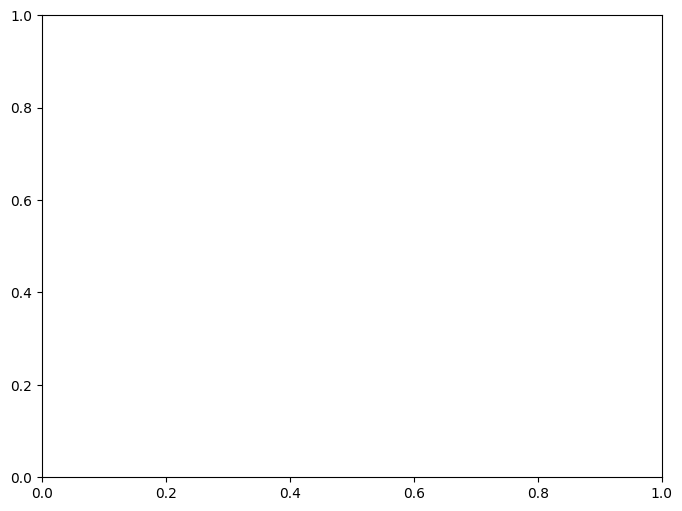

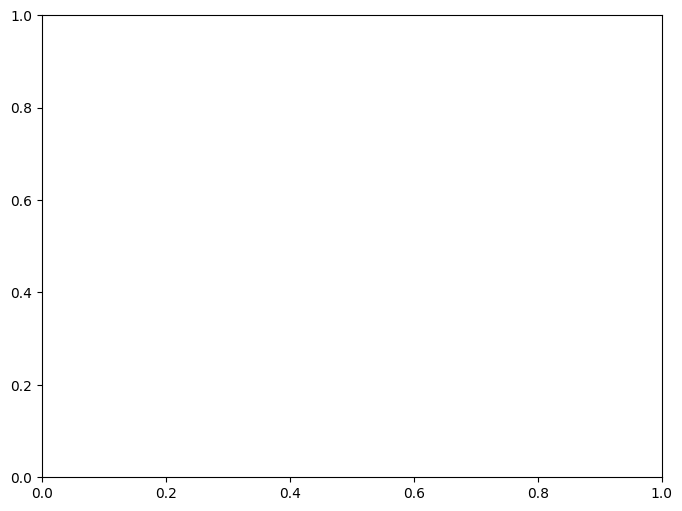

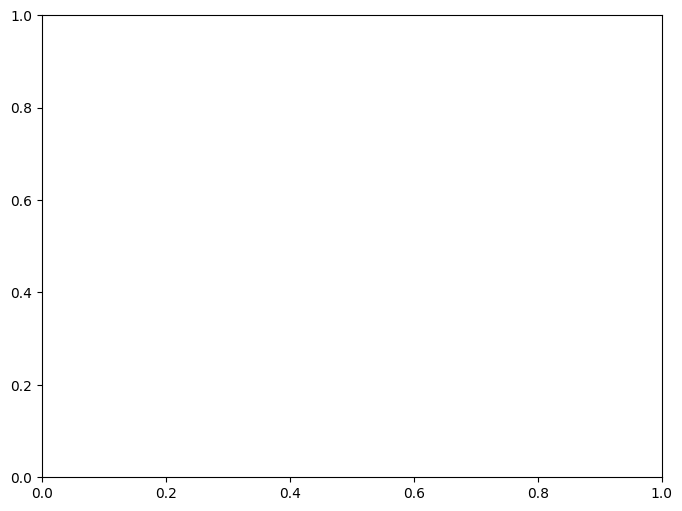

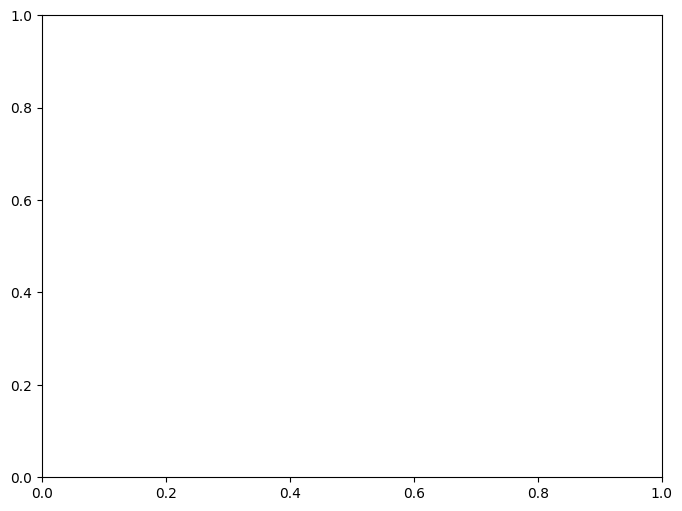

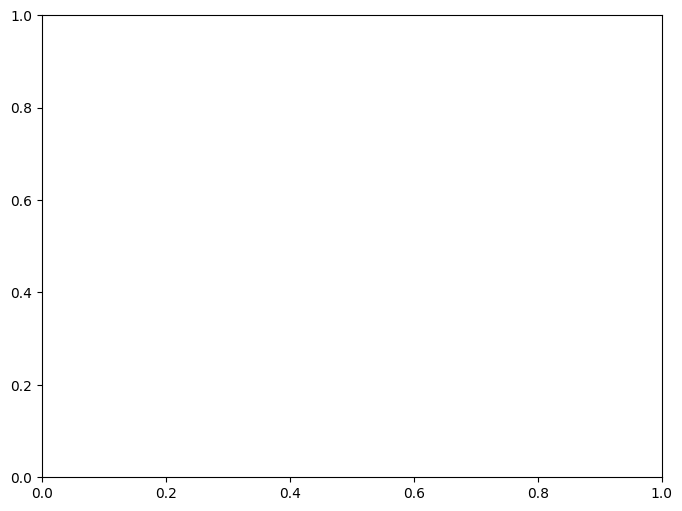

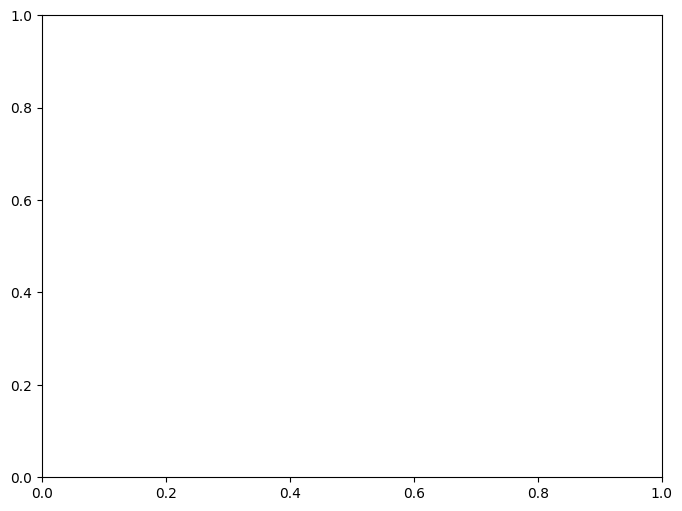

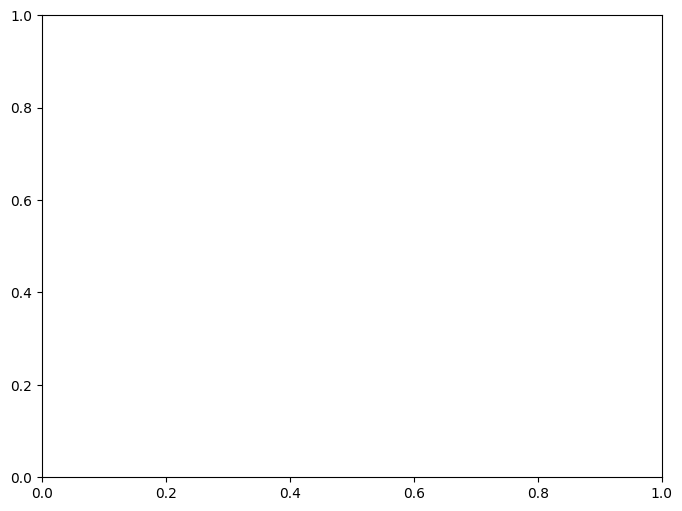

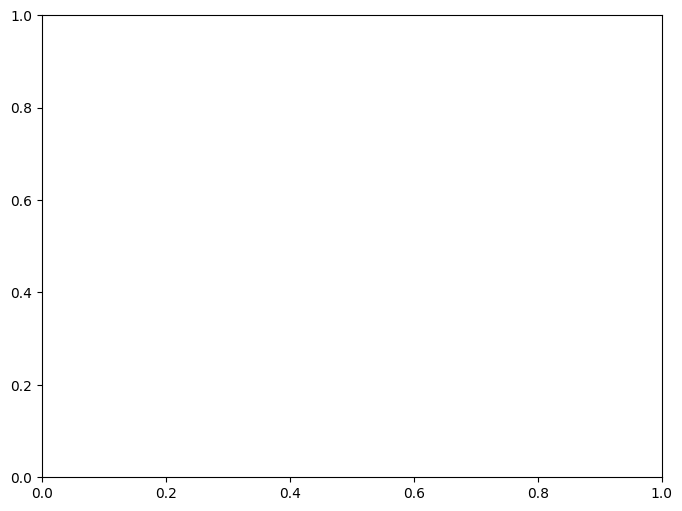

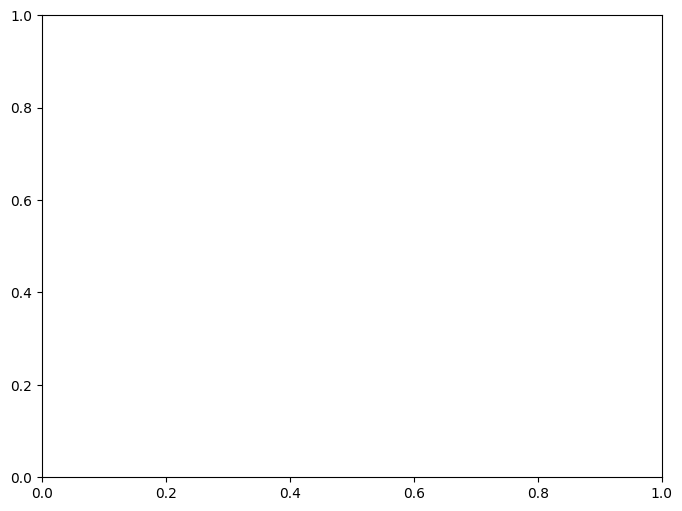

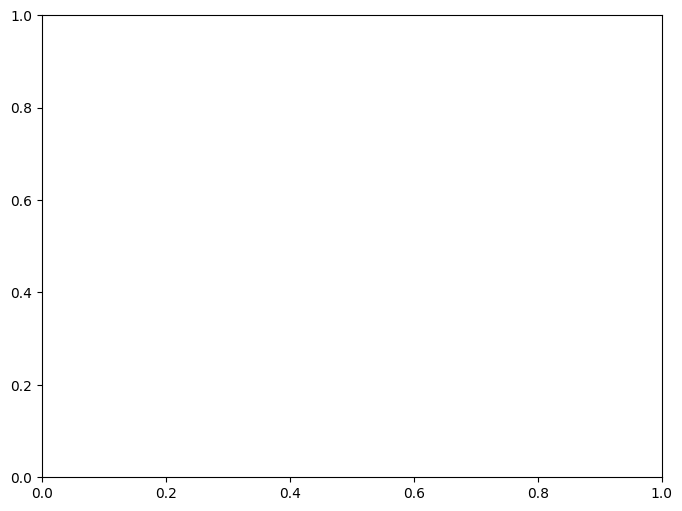

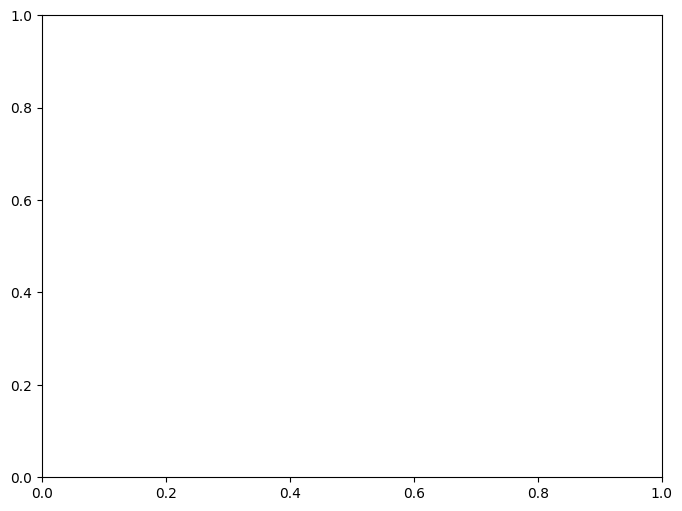

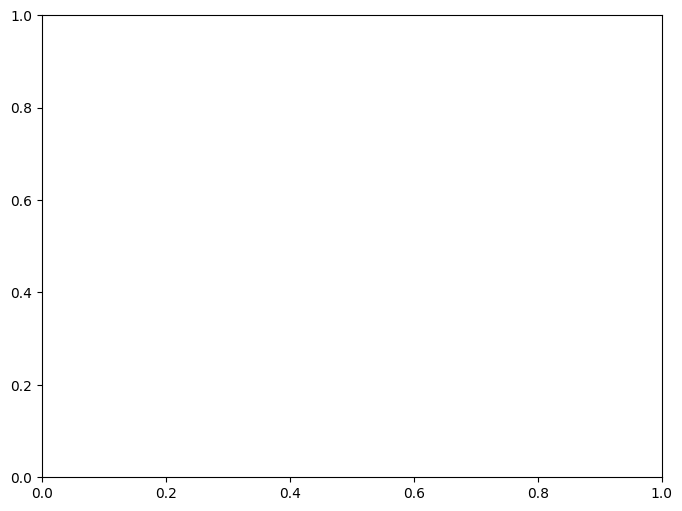

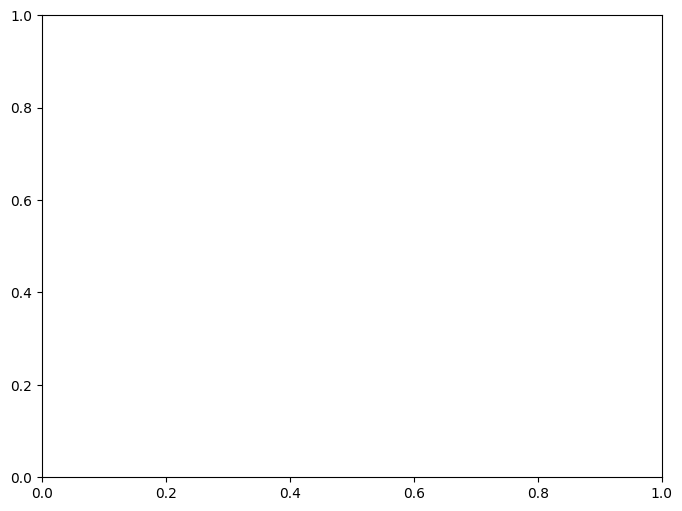

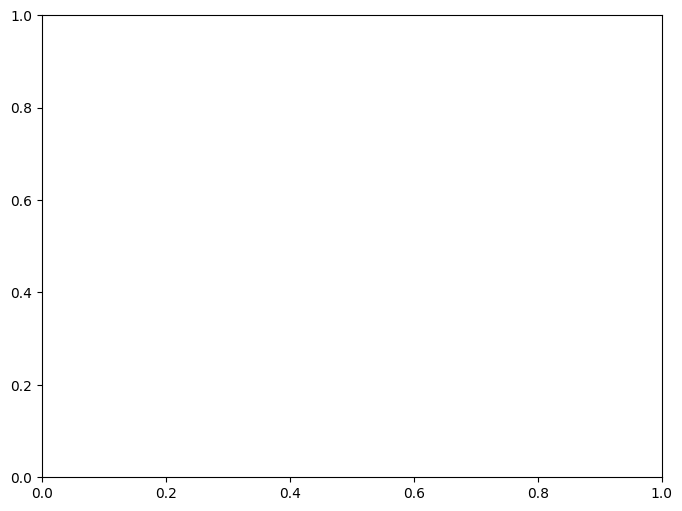

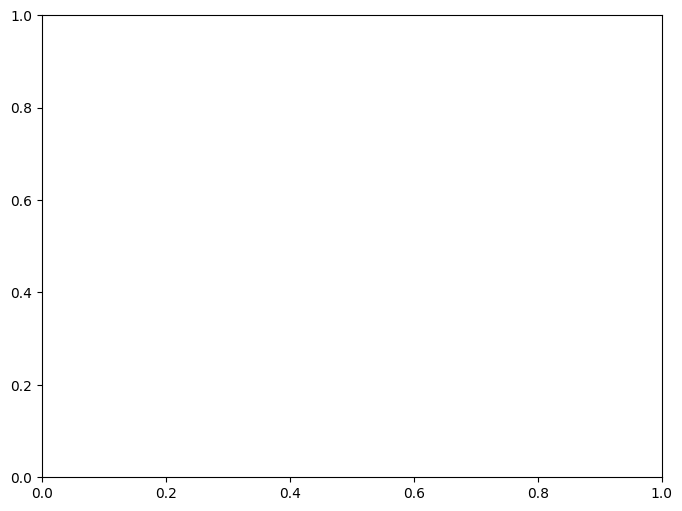

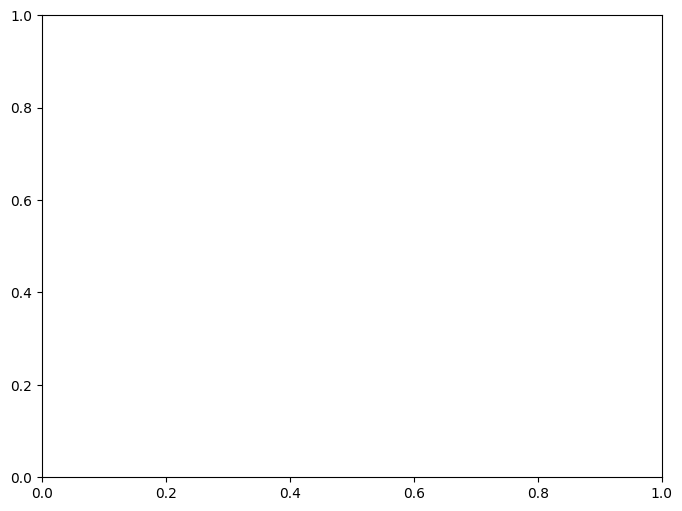

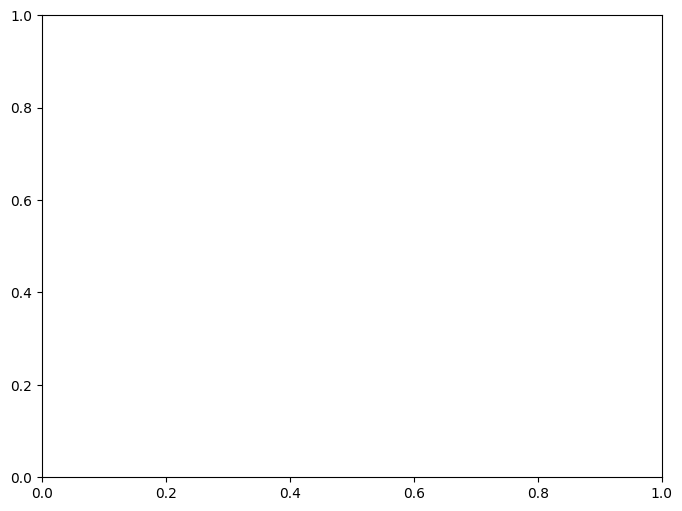

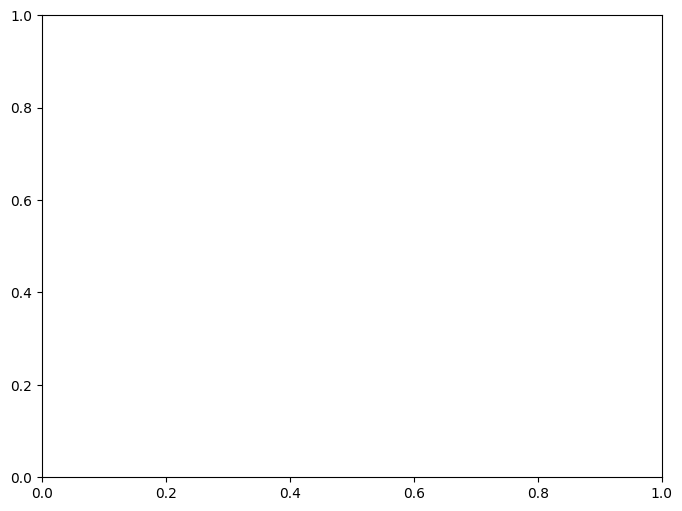

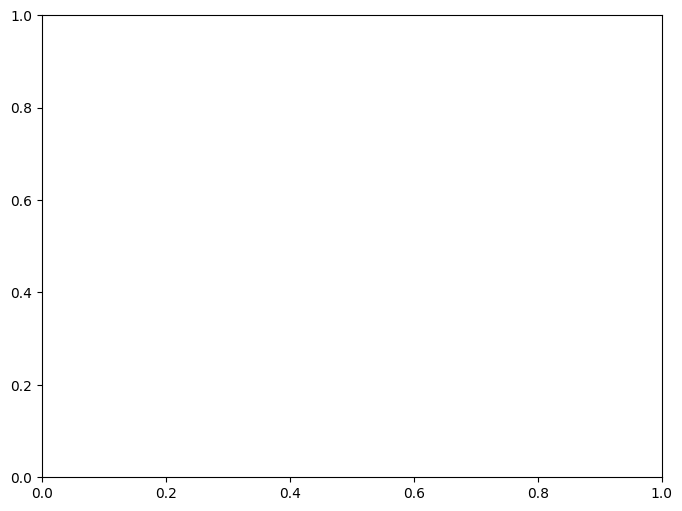

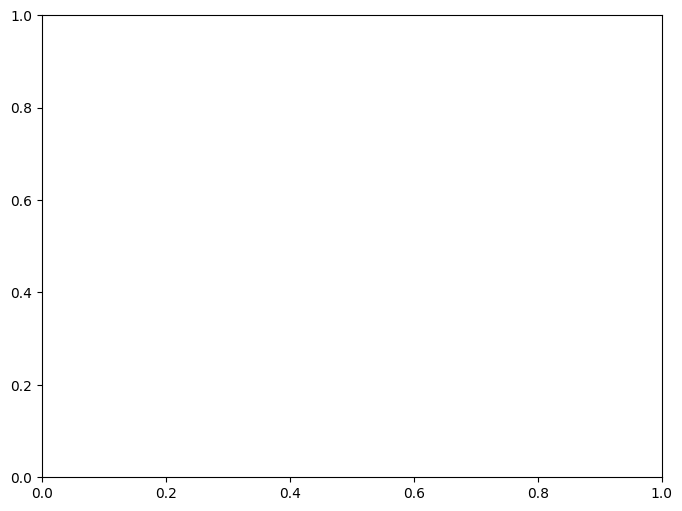

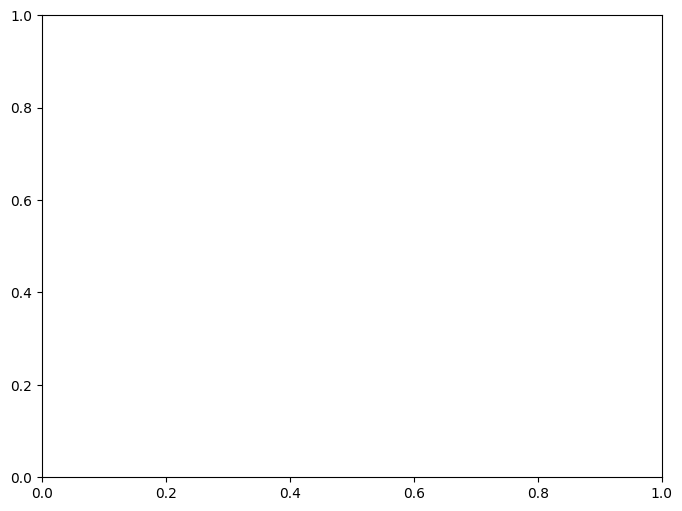

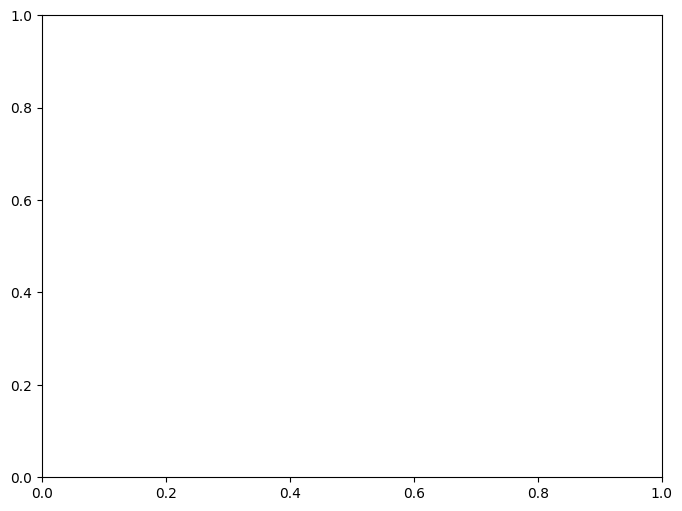

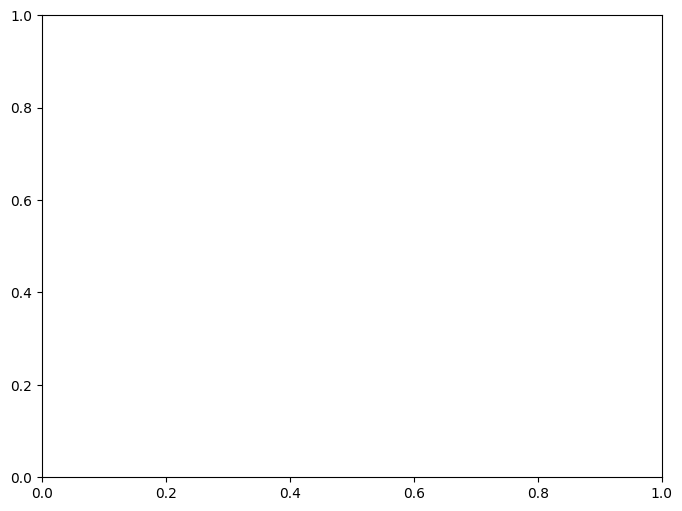

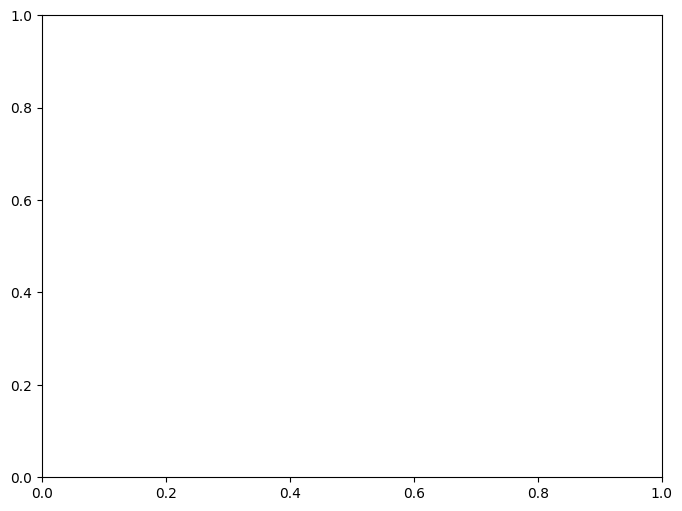

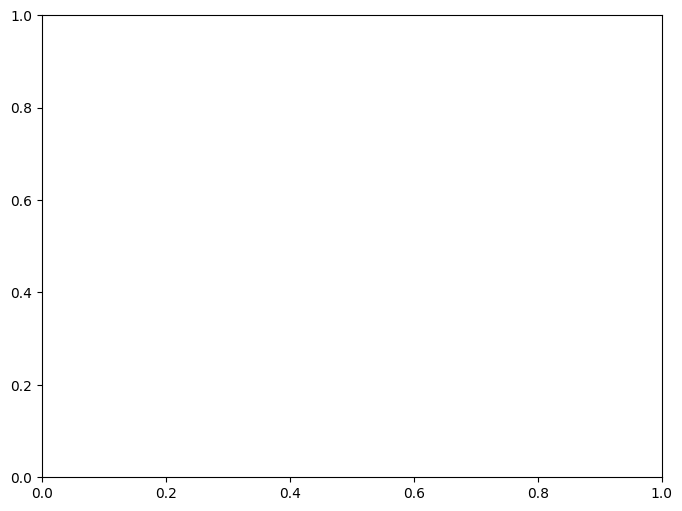

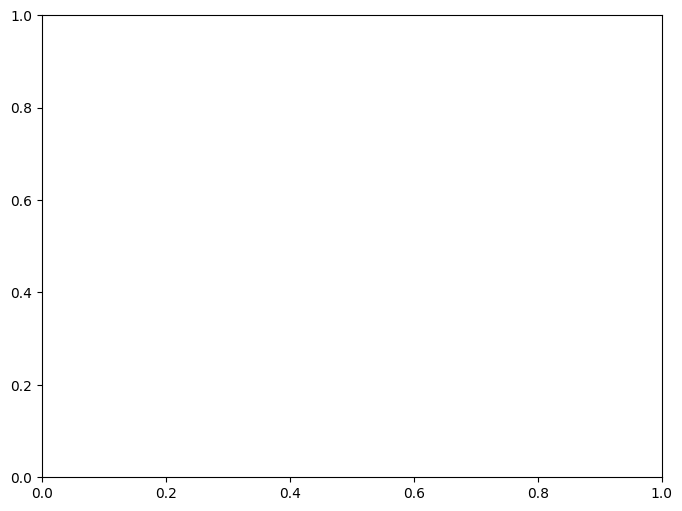

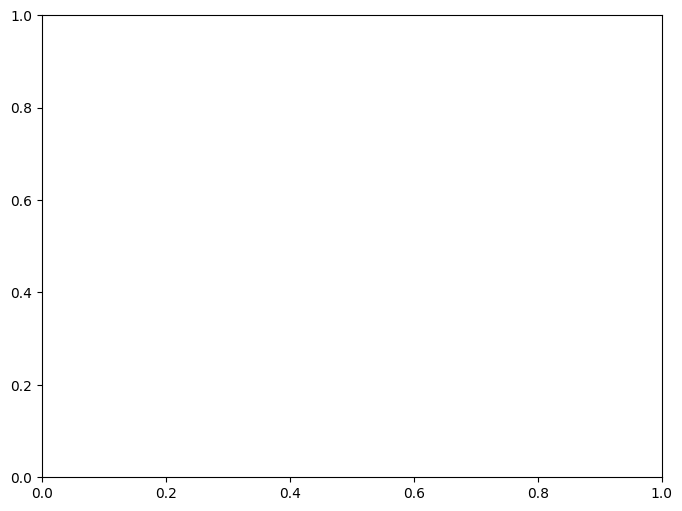

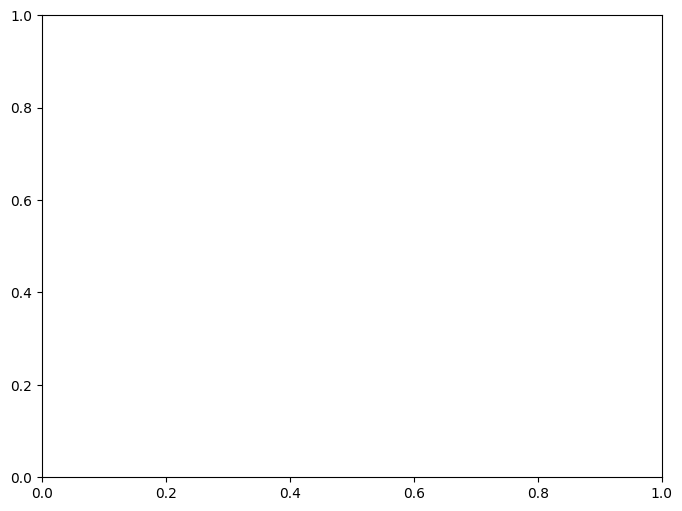

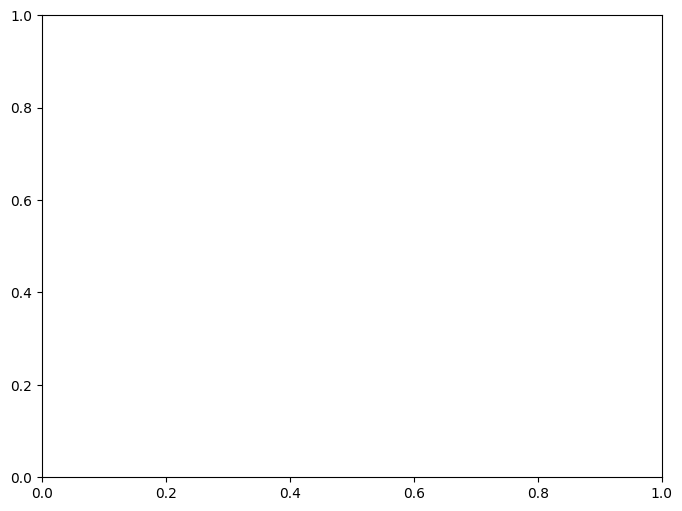

In [2]:
import hist
from hist import Hist
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import uproot
import mplhep


particles = ["p", "pi", "kaon"]
branches = ["chi2Sum", "eLOC0_fit", "eLOC1_fit", "ePHI_fit", 
             "eTHETA_fit", "eQOP_fit", "eT_fit", "err_eLOC0_fit", 
             "err_eLOC1_fit", "err_ePHI_fit", "err_eTHETA_fit", 
             "err_eQOP_fit", "err_eT_fit"
]


def do_assumption(branch, truth):
    spectrums = dict()

    for hypo in particles:
        filename = f"/workspaces/acts/tracksummary_kf_h_{hypo}_t_{truth}.root"
        with uproot.open(filename) as file:
            variable = file["tracksummary;1"][branch]
            raw = variable.array(library="ak")
            spectrums[hypo] = ak.flatten(raw)

    return spectrums


for branch in branches:
    for truth in particles:
        fig, ax = plt.subplots(figsize=(8, 6))
        specs = do_assumption(branch, truth)
        xmin, xmax = ak.min(specs[particles[0]]), ak.max(specs[particles[0]])

        container = Hist(hist.axis.Regular(200, xmin, xmax, name = "h"))
        for hypo in specs:
            container.fill(h=specs[hypo])
            container.plot1d(ax=ax, lw=1, label=hypo)

        ax.legend()
        ax.set_title(truth)
        fig.savefig(f"pics/{branch}_t_{truth}")
        ax.clear()
